In [1]:
# Change our current working directory
import os
import shutil

# Visualization lib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import random

# Data Preparation
import keras
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from time import time
import datetime

In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Basic Example of How-it-works

Lihat sampel datanya

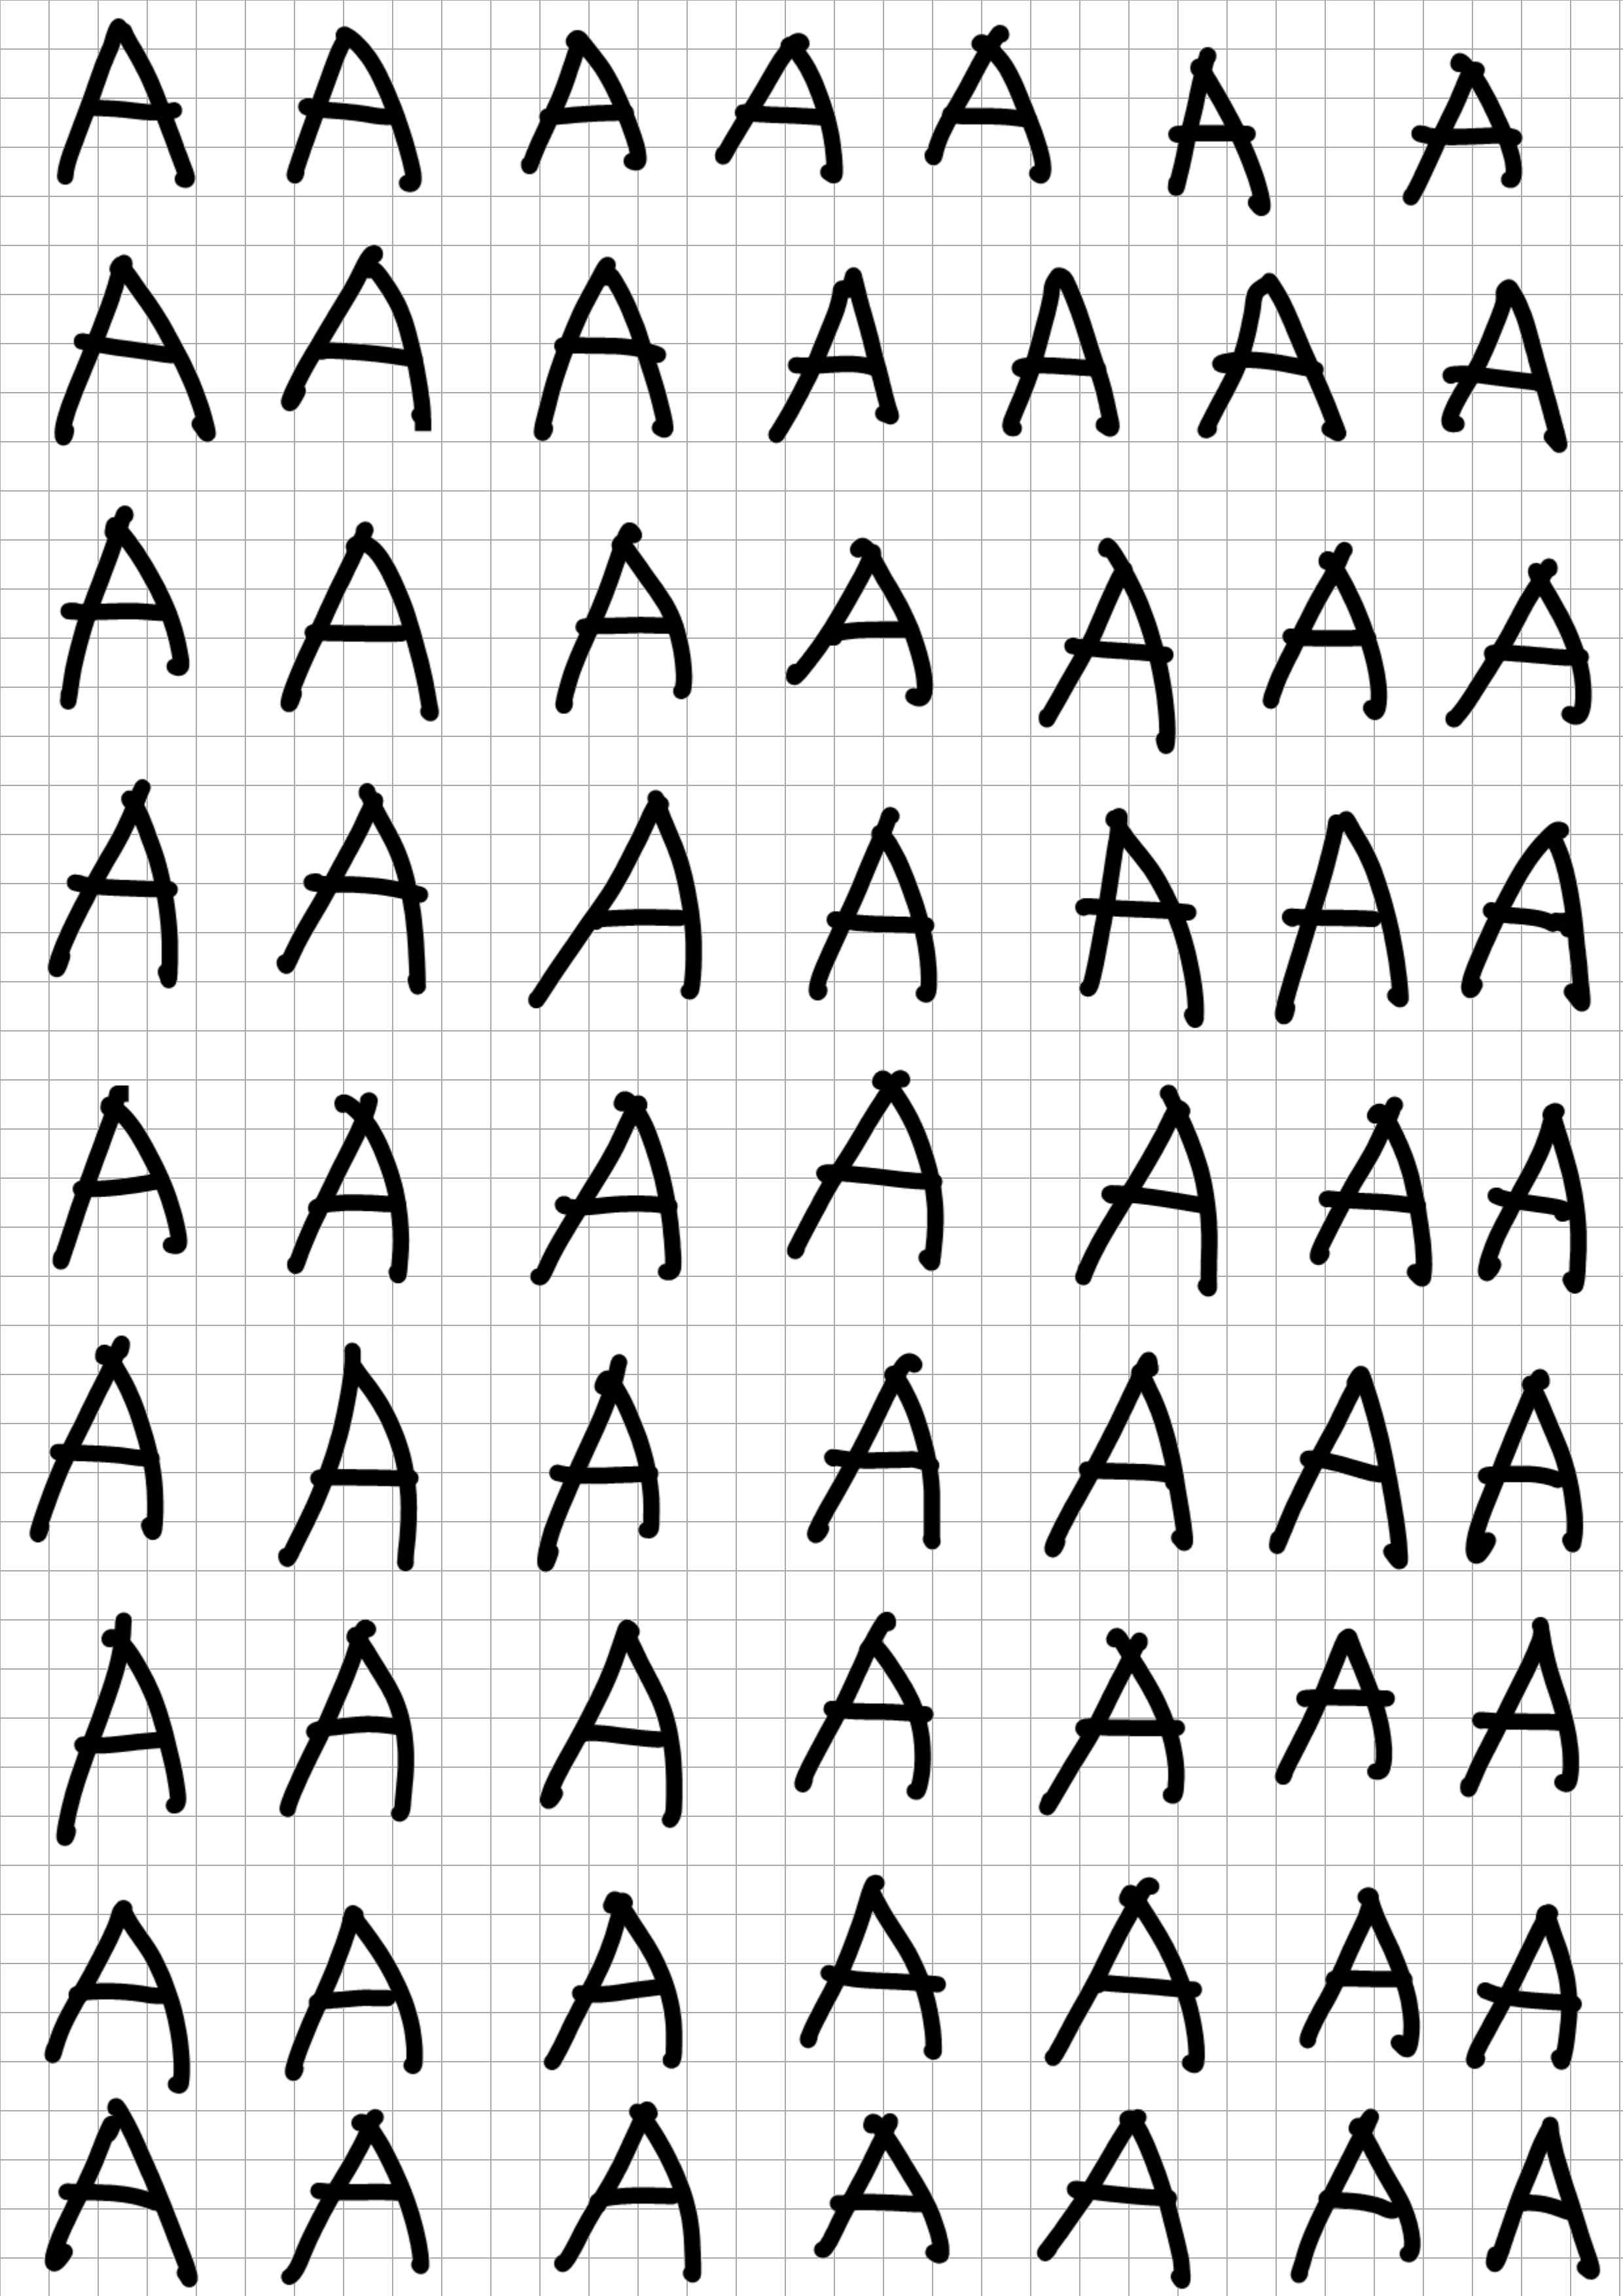

In [4]:
image = cv2.imread('/content/hurufA_Page1.jpg') 
cv2_imshow(image)

Jalankan kode ekstraksi karakternya

In [5]:
image = cv2.imread('/content/hurufA_Page1.jpg') 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# dilatate the image
dilated = cv2.dilate(thresh, np.ones((3,3)))

edges = cv2.Canny(dilated, 40, 150)

# dilatate the image
processed_image = cv2.dilate(edges, np.ones((3,3)))

cnts = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = thresh[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1

Lihat sampel hasil ekstraksinya

## Prepare Available Data

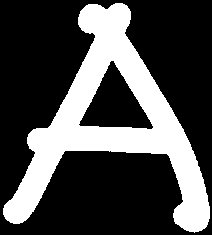

In [7]:
cv2_imshow(cv2.imread('/content/ROI_1.png'))

# Implementing the Process to Extract Alphabets and Numbers

Vault = direktori yang berisi direktori" kelas dengan gambar berupa tulisan tangan di kertas A4

In [ ]:
# Create your own working directory then set below's value to that dir :)
os.chdir('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Vault')
# os.chdir('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Vault2')

Ke-36 folder yang diupload dalam bentuk rar perlu diekstrak. Ini tahapan ekstraksinya.

In [ ]:
# !pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Ekstrak file rar `wahyu_hw.rar` yang berisi gambar tulisan tangan untuk 26 alfabet kapital dan 10 karakter angka.

In [ ]:
# import rarfile

# r = rarfile.RarFile('wahyu_hw.rar')
# r.extractall()
# r.close()

In [ ]:
data = os.listdir()

In [ ]:
data = [dir for dir in data if os.path.isdir(dir)]

In [ ]:
# list all data based on its label
data_dict = {}
for label in data:
  data_dict[label] = os.listdir(str(label))
  data_dict[label] = [item for item in data_dict[label] if item[-3:]=='jpg']

In [ ]:
# # delete png file.. because we are doing wrong things before hehe
# _list_data = os.listdir()
# _list_data = [file for file in _list_data if file[-3:]=='png']

# for file in _list_data:
#   os.remove(file)

In [ ]:
# # create folder for the result (folder yang mewakili kelas)
# for index in range (0,36):
#   os.makedirs(os.path.join('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Data_11', str(index)))

In [ ]:
data_dict

{'0': ['2_angka 0_Page1.jpg',
  '2_angka 0_Page3.jpg',
  '2_angka 0_Page2.jpg',
  '2_angka 0_Page5.jpg',
  '2_angka 0_Page4.jpg'],
 '13': ['2_huruf D_Page1.jpg',
  '2_huruf D_Page2.jpg',
  '2_huruf D_Page4.jpg',
  '2_huruf D_Page3.jpg',
  '2_huruf D_Page5.jpg'],
 '18': ['1_hurufI_Page2.jpg',
  '1_hurufI_Page1.jpg',
  '1_hurufI_Page5.jpg',
  '1_hurufI_Page3.jpg',
  '1_hurufI_Page4.jpg',
  '1_hurufI_Page8 (1).jpg',
  '1_hurufI_Page6.jpg',
  '1_hurufI_Page7.jpg',
  '1_hurufI_Page9 (1).jpg',
  '1_hurufI_Page10.jpg'],
 '24': ['2_huruf O_Page1.jpg',
  '2_huruf O_Page4.jpg',
  '2_huruf O_Page2.jpg',
  '2_huruf O_Page3.jpg',
  '2_huruf O_Page5.jpg',
  '2_huruf O_Page6.jpg'],
 '5': ['2_angka5_Page1.jpg',
  '2_angka5_Page4.jpg',
  '2_angka5_Page3.jpg',
  '2_angka5_Page2.jpg',
  '2_angka5_Page5.jpg'],
 '7': ['2_angka7_Page1.jpg',
  '2_angka7_Page2.jpg',
  '2_angka7_Page3.jpg',
  '2_angka7_Page4.jpg',
  '2_angka7_Page5.jpg']}

## Kode Ekstraksi Karakter di Tiap-tiap Gambar Tulisan Tangan

In [ ]:
# process extract roi each file
for label in data_dict:
  ROI_number = 0
  for image in data_dict[label]:
    image = cv2.imread(os.path.join(str(label), image)) 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # dilatate the image
    dilated = cv2.dilate(thresh, np.ones((3,3)))

    edges = cv2.Canny(dilated, 40, 150)

    # dilatate the image
    processed_image = cv2.dilate(edges, np.ones((3,3)))

    cnts = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        # use dilated image to be cropped
        img = dilated[y:y+h, x:x+w]

        # set the border of the image, giving inside feel for the image. black bprder outside the ROI
        border_v = 40
        border_h = 40
        # desired output image. in this code we want to make the image have 1:1 aspect ratio
        IMG_COL , IMG_ROW = 346, 346
        if (IMG_COL/IMG_ROW) >= (img.shape[0]/img.shape[1]):
            border_v = int((((IMG_COL/IMG_ROW)*img.shape[1])-img.shape[0])/2)
        else:
            border_h = int((((IMG_ROW/IMG_COL)*img.shape[0])-img.shape[1])/2)
        img = cv2.copyMakeBorder(img, border_v, border_v, border_h, border_h, cv2.BORDER_CONSTANT, 0)
        img = cv2.resize(img, (IMG_ROW, IMG_COL))

        cv2.imwrite(os.path.join('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Data_11', str(label), 'Img{}_(2){}.png'.format(label, ROI_number)), img)
        ROI_number += 1

In [ ]:
data_dict

In [ ]:
for index in range(0,36):
  print(str(index), ': ', len(os.listdir('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Data_11/{}'.format(str(index)))))

0 :  528
1 :  391
2 :  380
3 :  352
4 :  335
5 :  763
6 :  341
7 :  661
8 :  748
9 :  383
10 :  274
11 :  343
12 :  301
13 :  629
14 :  315
15 :  276
16 :  298
17 :  337
18 :  473
19 :  307
20 :  331
21 :  320
22 :  427
23 :  388
24 :  556
25 :  281
26 :  317
27 :  369
28 :  336
29 :  383
30 :  332
31 :  353
32 :  335
33 :  283
34 :  321
35 :  428


## Visualize the Data

In [ ]:
image_formats = ["png", "jpg"];

def show_images(image_files):  
    plt.figure() # specifying the overall grid size
    fig = plt.figure(figsize=(10,10))
    fig.patch.set_facecolor('xkcd:gray')
    
    for i in range(len(image_files)):
        plt.subplot(8,5,i+1)    # the number of images in the grid is 5*5 (25)
        img=mpimg.imread(image_files[i])
        plt.imshow(img)
        plt.tight_layout()
        plt.axis('off')
        plt.title(image_files[i].split("/")[7]) # The name of the character
    
    plt.show()

In [ ]:
def list_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            if name.endswith(".jpg") or name.endswith(".png"):
              arr.append(os.path.join(root, name))
              break
    return arr

<Figure size 432x288 with 0 Axes>

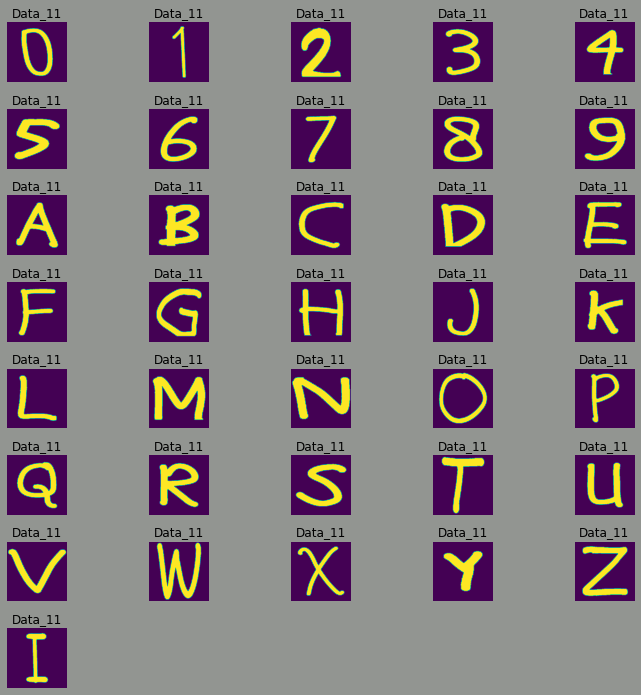

In [ ]:
image_list = list_files("/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Data_11")
show_images(image_list)

In [ ]:
# def count_files(dir):
#     arr = []
#     for root, dirs, files in os.walk(dir):
#         count = 0
#         for name in files:
#             if name.endswith(".jpg") or name.endswith(".png"):
#               count = count + 1
#         if count > 0:
#           arr.append(count)
#     return arr

In [ ]:
# def get_all_char_names(dir):
#     arr = []
#     for root, dirs, files in os.walk(dir):
#         # print(dirs)
#         arr.append(dirs)
#         break
#     return arr

## Data Preparation

Pada bagian ini, data dipisahkan ke dalam folder train dan test. 

In [ ]:
SPLIT_SIZE = 0.8 #80 percent

In [8]:
"""
Menghapus folder train dan test hasil ekstraksi bilamana hasilnya tidak sesuai dengna yang diharapkan
"""
# !rm -r '/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Train_11'
# !rm -r '/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Test_11'

In [ ]:
"""
create train and test folder
"""
# for index in range (0, 36):
#   os.makedirs((os.path.join('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/', 'Train_11(2)',str(index))))
#   os.makedirs((os.path.join('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/', 'Test_11(2)',str(index))))

In [ ]:
data = {}
trainDataList = {}
testDataList = {}

for labels in range(0,36):
  data[labels] = os.listdir(os.path.join('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Data_11', str(labels)))
  trainDataList[labels] = random.sample(data[labels], round((SPLIT_SIZE)*len(data[labels])))
  testDataList[labels] = [data for data in data[labels] if data not in trainDataList[labels]]
  

In [ ]:
# pindahkan data ke lokasi masing-masing (train/test)
for labels in range(0,36):
  for item in trainDataList[labels]:
    shutil.copy2(os.path.join('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Data_11', str(labels), item), os.path.join('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw', 'Train_11(2)',str(labels), item))

for labels in range(0,36):
  for item in testDataList[labels]:
    shutil.copy2(os.path.join('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Data_11', str(labels), item), os.path.join('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw', 'Test_11(2)',str(labels), item))

Testing kode yang mengekstrak banyak karakter dalam satu gambar satu persatu

In [ ]:
"""
TESTING PREPROCESSING CODE
"""
# image = cv2.imread('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Vault/1/angka1_Page1.jpg') 

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# # dilatate the image
# dilated = cv2.dilate(thresh, np.ones((3,3)))

# edges = cv2.Canny(dilated, 40, 150)

# # dilatate the image
# processed_image = cv2.dilate(edges, np.ones((3,3)))

# cnts = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# for c in cnts[:5]:
#     x,y,w,h = cv2.boundingRect(c)
#     img = dilated[y:y+h, x:x+w]

#     border_v = 50
#     border_h = 50
#     IMG_COL , IMG_ROW = 322, 322
#     if (IMG_COL/IMG_ROW) >= (img.shape[0]/img.shape[1]):
#         border_v = int((((IMG_COL/IMG_ROW)*img.shape[1])-img.shape[0])/2)
#     else:
#         border_h = int((((IMG_ROW/IMG_COL)*img.shape[0])-img.shape[1])/2)
#     img = cv2.copyMakeBorder(img, border_v, border_v, border_h, border_h, cv2.BORDER_CONSTANT, 0)
#     img = cv2.resize(img, (IMG_ROW, IMG_COL))
    
#     cv2_imshow(img)

Dari sini, karakter-karakter yang sudah diekstrak telah di-split ke dalam folder train dan test. Selanjutnya, data akan ditambahkan ke array yang menyimpan data MNIST 0-9 dan Kaggle Alphabet A-Z.

# Data Loading and Appending

## Load the Data

Load A-Z datasets

In [ ]:
# # download a-z dataset
# !kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

In [ ]:
# # unzip dataset into a folder
# !unzip az-handwritten-alphabets-in-csv-format.zip -d Datasets

In [ ]:
# load the dataset
dataset_az = pd.read_csv('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/A_Z Handwritten Data.csv').astype('float32')

# separate into data and labels
azData = dataset_az.drop('0', axis = 1)
azLabels = dataset_az['0']

In [ ]:
# reshape 1 dim data into 28*28
azData = np.reshape(azData.values, (azData.shape[0], 28, 28))

Load MNIST dataset


In [ ]:
# import mnist datasets
from tensorflow.keras.datasets import mnist

In [ ]:
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()

trainData.shape, trainLabels.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [ ]:
digitsData = np.vstack([trainData, testData])
digitsLabels = np.hstack([trainLabels, testLabels])

Combine dataset

In [ ]:
# the MNIST dataset occupies the labels 0-9, so let's add 10 to every
# A-Z label to ensure the A-Z characters are not incorrectly labeled
# as digits
azLabels += 10

# stack the A-Z data and labels with the MNIST digits data and labels
data = np.vstack([azData, digitsData])
labels = np.hstack([azLabels, digitsLabels])

# data = [cv2.resize(image, (32, 32)) for image in data] #ini kalau mau resize ke 32x32
data = np.array(data, dtype="float32")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


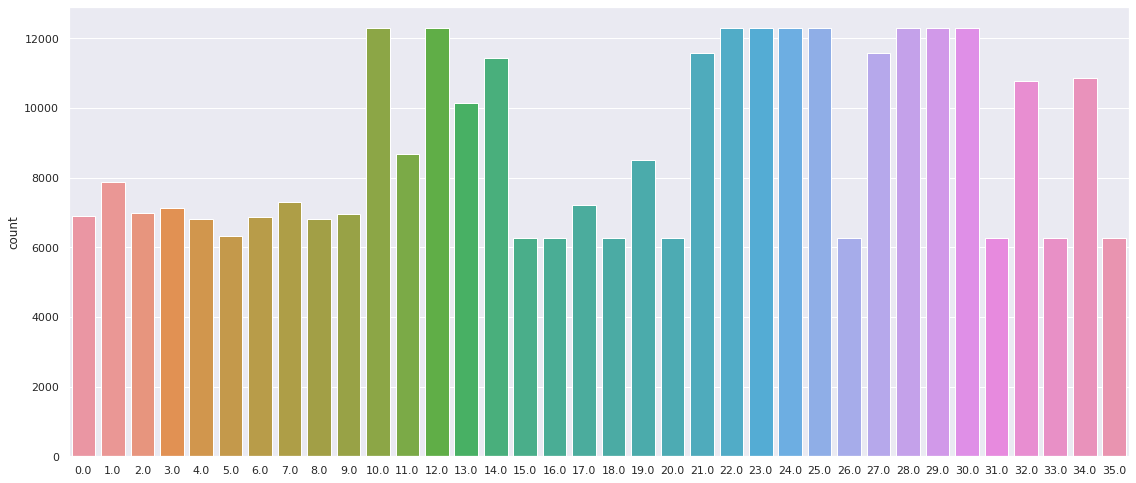

In [ ]:
sns.set(rc={'figure.figsize':(19,8.27)})

sns.countplot(labels)

In [ ]:
# account for skew in the labeled data
classTotals= labels.shape[0]
totalDataset = {}

# loop over all classes and calculate the class weight
for i in range(0, 36):
  totalDataset[i] = np.count_nonzero(labels == i)

totalDataset

{0: 6903,
 1: 7877,
 2: 6990,
 3: 7141,
 4: 6824,
 5: 6313,
 6: 6876,
 7: 7293,
 8: 6825,
 9: 6958,
 10: 13869,
 11: 8668,
 12: 23409,
 13: 10134,
 14: 11440,
 15: 1163,
 16: 5762,
 17: 7218,
 18: 1120,
 19: 8493,
 20: 5603,
 21: 11586,
 22: 12336,
 23: 19010,
 24: 57825,
 25: 19341,
 26: 5812,
 27: 11566,
 28: 48419,
 29: 22495,
 30: 29008,
 31: 4182,
 32: 10784,
 33: 6272,
 34: 10859,
 35: 6076}

In [ ]:
# add a channel dimension to every image in the dataset 
data = np.expand_dims(data, axis=-1)

In [ ]:
data.shape

(442450, 32, 32, 1)

In [ ]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=1)

## Adding Data

In [ ]:
# To load images to features and labels
"""
#ini ngappend dalam range 0-255!!
"""
def load_images_to_data(image_directory, features_data, label_data):
    list_of_folder = os.listdir(image_directory)
    list_of_files = {}

    for label in list_of_folder:
      list_of_files[label] = os.listdir(os.path.join(image_directory, label))

    for label in list_of_folder:
      for file in list_of_files[label]:
          image_file_name = os.path.join(image_directory, label, file)
          if ".png" in image_file_name:
              im = cv2.imread(image_file_name)
              im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
              im = cv2.resize(im, (28, 28))
              im = np.expand_dims(im, axis = -1)
              im = np.reshape(im, (1,28,28,1))
              features_data = np.append(features_data, im, axis=0)
              label_data = np.append(label_data, [float(label)], axis=0)
              print(file, " done")
    return features_data, label_data

# gunakan ini kalau gambar berukuran 32x32
def load_images_to_data32(image_directory, features_data, label_data):
    list_of_folder = os.listdir(image_directory)
    list_of_files = {}

    for label in list_of_folder:
      list_of_files[label] = os.listdir(os.path.join(image_directory, label))

    for label in list_of_folder:
      for file in list_of_files[label]:
          image_file_name = os.path.join(image_directory, label, file)
          if ".png" in image_file_name:
              im = cv2.imread(image_file_name)
              im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
              # im = cv2.resize(im, (28, 28))
              im = cv2.resize(im, (32, 32))
              im = np.expand_dims(im, axis = -1)
              im = np.reshape(im, (1,32,32,1))
              features_data = np.append(features_data, im, axis=0)
              label_data = np.append(label_data, [float(label)], axis=0)      
              print(file, " done")
    return features_data, label_data

In [ ]:
# trainX, trainY = load_images_to_data('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Train_11', trainX, trainY)
# testX, testY = load_images_to_data('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Test_11', testX, testY)

Streaming output truncated to the last 5000 lines.
Img28_14.png  done
Img28_45.png  done
Img28_53.png  done
Img28_18.png  done
Img28_44.png  done
Img28_46.png  done
Img28_2.png  done
Img28_3.png  done
Img28_65.png  done
Img28_81.png  done
Img28_24.png  done
Img28_188.png  done
Img28_182.png  done
Img28_137.png  done
Img28_142.png  done
Img28_106.png  done
Img28_138.png  done
Img28_160.png  done
Img28_94.png  done
Img28_156.png  done
Img28_181.png  done
Img28_147.png  done
Img28_159.png  done
Img28_118.png  done
Img28_82.png  done
Img28_143.png  done
Img28_170.png  done
Img28_104.png  done
Img28_100.png  done
Img28_110.png  done
Img28_146.png  done
Img28_114.png  done
Img28_83.png  done
Img28_125.png  done
Img28_153.png  done
Img28_191.png  done
Img28_185.png  done
Img28_177.png  done
Img28_130.png  done
Img28_148.png  done
Img28_134.png  done
Img28_133.png  done
Img28_152.png  done
Img28_123.png  done
Img28_174.png  done
Img28_103.png  done
Img28_119.png  done
Img28_109.png  done
Img28

In [ ]:
# # lanjutan mau buat templet dataset gambar
# # hapus nilai init yang -tak hingga s.d. +tak hingga
# trainX=trainX[1:]
# trainY=trainY[1:]
# testX=testX[1:]
# testY=testY[1:]

# # simpandatanya
# trainX = np.asarray(trainX)
# trainY = np.asarray(trainY)
# testX = np.asarray(testX)
# testY = np.asarray(testY)

# # save to npy file
# np.save('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Model/trainX_data_gambar32.npy', trainX)
# np.save('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Model/trainY_data_gambar32.npy', trainY)
# np.save('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Model/testX_data_gambar32.npy', testX)
# np.save('/content/drive/MyDrive/[ML] Capstone PS283/Datasets/wahyu_hw/Model/testY_data_gambar32.npy', testY)

In [ ]:
# Normalize the data
trainX /= 255.0
testX /=255.0

# convert the labels from integers to vectors
le = LabelBinarizer()

trainY = le.fit_transform(trainY)
testY = le.fit_transform(testY)


In [ ]:
# account for skew in the labeled data
classTotalsTrain = trainY.sum(axis=0)
classTotalsTest = testY.sum(axis=0)
totalDataset = {}
classWeight = {}

# loop over all classes and calculate the class weight
for i in range(0, len(classTotalsTrain)):
  classWeight[i] = (classTotalsTrain.max() / classTotalsTrain[i]) + (classTotalsTest.max() / classTotalsTest[i]) 
  totalDataset[i] = classTotalsTrain[i] + classTotalsTest[i]

In [ ]:
totalDataset

{0: 7427,
 1: 8268,
 2: 7369,
 3: 7493,
 4: 7159,
 5: 7076,
 6: 7217,
 7: 7954,
 8: 7573,
 9: 7341,
 10: 14143,
 11: 9011,
 12: 23710,
 13: 10761,
 14: 11755,
 15: 1439,
 16: 6060,
 17: 7555,
 18: 1592,
 19: 8800,
 20: 5934,
 21: 11906,
 22: 12763,
 23: 19398,
 24: 58379,
 25: 19622,
 26: 6125,
 27: 11935,
 28: 48755,
 29: 22878,
 30: 29340,
 31: 4535,
 32: 11119,
 33: 6555,
 34: 11180,
 35: 6504}

In [ ]:
classWeight

{0: 14.911914381059574,
 1: 13.628351309707242,
 2: 15.240569497705074,
 3: 15.040724729571348,
 4: 15.744759782791542,
 5: 15.323463433710419,
 6: 15.613037323463626,
 7: 13.81278586706292,
 8: 14.382943001680829,
 9: 15.28928676762041,
 10: 8.170862146203623,
 11: 12.601670428097691,
 12: 4.907412433262848,
 13: 10.381139279979065,
 14: 9.759680596083927,
 15: 73.52649656745454,
 16: 18.56839924206245,
 17: 14.944714634428458,
 18: 66.78623779321454,
 19: 12.940519493303754,
 20: 18.85969095401813,
 21: 9.635424642546294,
 22: 8.933360135154999,
 23: 5.9537935834066005,
 24: 2.0,
 25: 5.919879936810139,
 26: 18.34320537071532,
 27: 9.57598955733108,
 28: 2.4015376755053683,
 29: 5.064824555610491,
 30: 3.971712467203071,
 31: 24.311284260586994,
 32: 10.285430976215377,
 33: 17.250656370656372,
 34: 10.24253545286761,
 35: 17.08582691364689}